In [1]:
import sys, os
import torch
import numpy as np
from sklearn.metrics import mean_squared_error
sys.path.append("../")
from cUNet_pytorch_pooling import cUNet
from utilities import define_dataset, inference_phase_rUNet, inference_phase_rUNet_plot_notebook, training_phase_rUNet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
DATA_DIR_DEEPTHOUGHT="/storage/yw18581/data"
DATA_DIR_IH = "/data/uob/"

In [4]:
data_dir = DATA_DIR_DEEPTHOUGHT

In [5]:
model_name = "../model/trained_cUNet_pytorch_regression_2_4_10_20_25_35_dataset_200epochs_coeff_mask0.75_validation.pkl"

In [6]:
model = cUNet(out_size=1)
model.load_state_dict(torch.load(model_name));

In [7]:
root_folder = os.path.join(data_dir, "dataset")

In [8]:
excluded = ['10x10_2mm_first_clean', '10x10_4mm_first_clean', '10x10_10mm_first_clean', '10x10_20mm_first_clean',
            '10x10_25mm_first_clean', '10x10_35mm_first_clean',
            '10x10_2mm_second_clean', '10x10_4mm_second_clean', '10x10_10mm_second_clean', '10x10_20mm_second_clean',
            '10x10_25mm_second_clean', '10x10_35mm_second_clean',
            '10x10_2mm_third_clean', '10x10_4mm_third_clean', '10x10_10mm_third_clean', '10x10_20mm_third_clean', 
           '10x10_25mm_third_clean', '10x10_35mm_third_clean']

In [9]:
data_loaders, data_lengths = define_dataset(root_folder, batch_size=16, excluded_list=excluded)

In [10]:
data_lengths

{'train': 2261, 'val': 565, 'test': 706}

batch 1
1: true_dist: 15, pred_dist: [14.7608595]


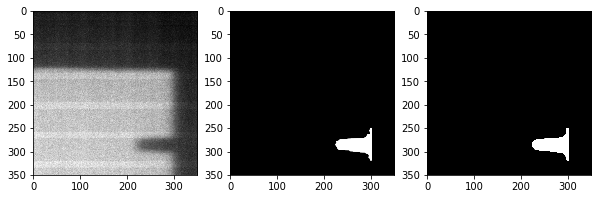

2: true_dist: 30, pred_dist: [30.920345]


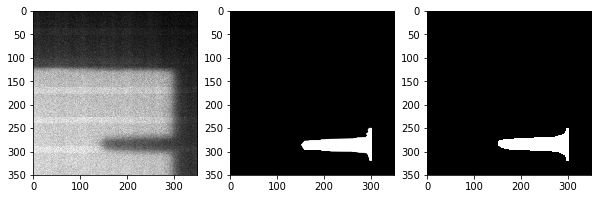

3: true_dist: 3, pred_dist: [3.5732977]


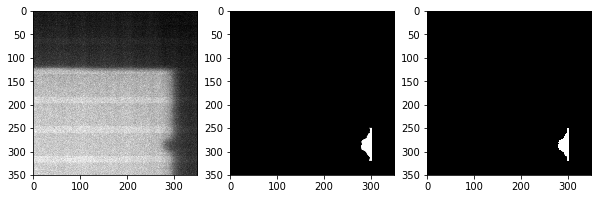

4: true_dist: 1, pred_dist: [1.904188]


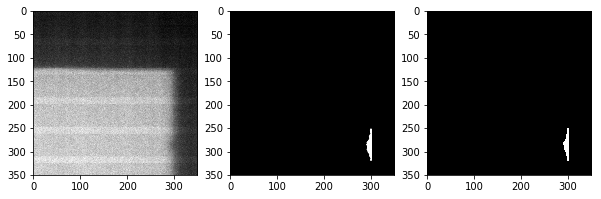

5: true_dist: 1, pred_dist: [1.9064053]


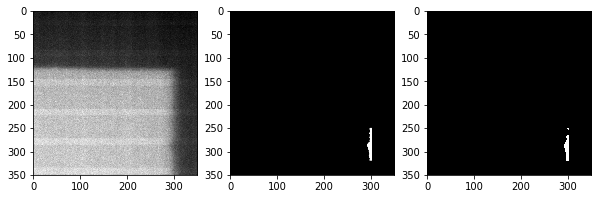

6: true_dist: 30, pred_dist: [30.892685]


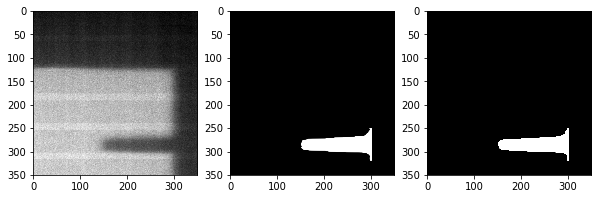

7: true_dist: 3, pred_dist: [3.3994493]


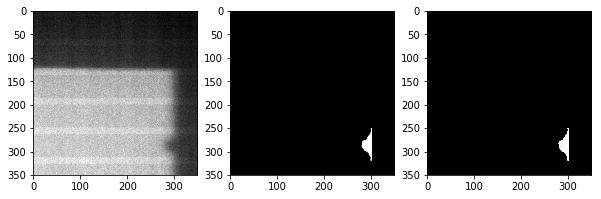

8: true_dist: 3, pred_dist: [3.410562]


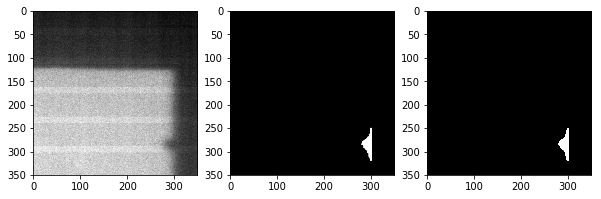

9: true_dist: 15, pred_dist: [14.768683]


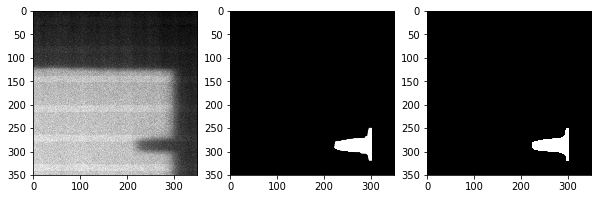

10: true_dist: 15, pred_dist: [14.776894]


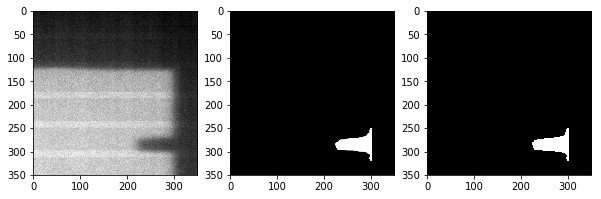

11: true_dist: 15, pred_dist: [14.771586]


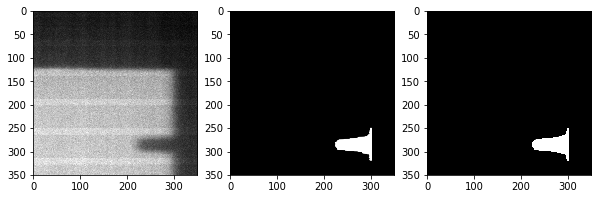

12: true_dist: 15, pred_dist: [14.7696085]


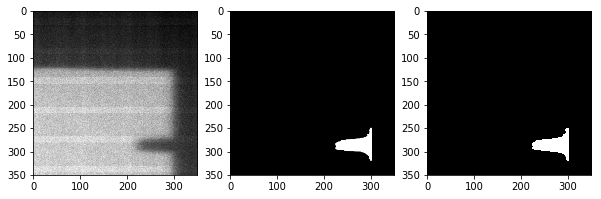

13: true_dist: 3, pred_dist: [3.4574559]


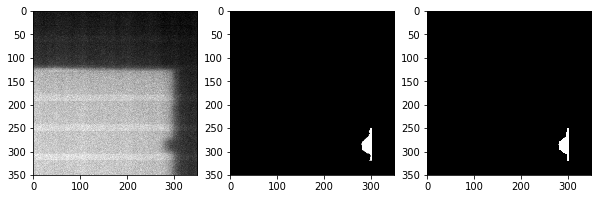

14: true_dist: 3, pred_dist: [3.3278873]


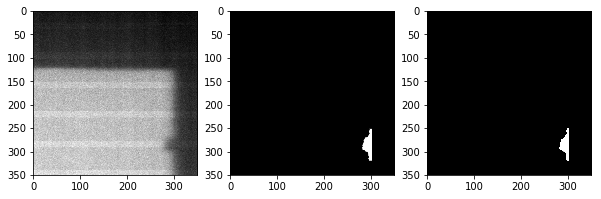

15: true_dist: 1, pred_dist: [1.9071552]


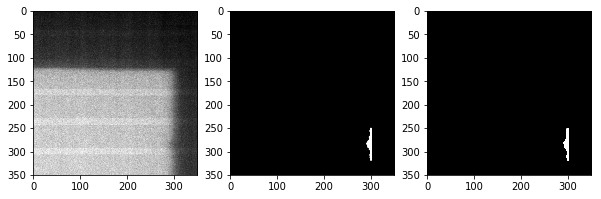

16: true_dist: 15, pred_dist: [14.767293]


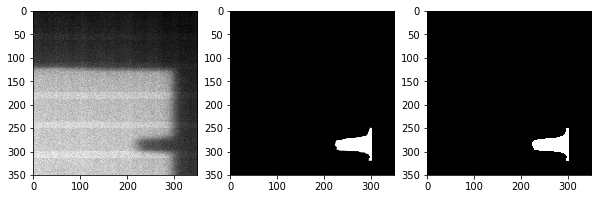

In [11]:
inference_phase_rUNet_plot_notebook(model, data_loaders, data_lengths, batch_size=16, stop=2)

In [12]:
torch.cuda.empty_cache()

In [13]:
y_true, y_pred = inference_phase_rUNet(model, data_loaders, data_lengths, batch_size=16,
                                      notebook=True)

In [14]:
print("mse: {}".format(mean_squared_error(y_true, y_pred)))

mse: 0.49749286398534154


In [15]:
def get_idx(arr, key):
    return np.where(arr==key)[0]

In [16]:
def idx_mse(dist, true_arr = y_true, preds_arr = y_pred):
    idx = np.where(true_arr==dist)[0]
    mse = mean_squared_error(true_arr[idx], preds_arr[idx])
    print(dist, mse)
    return idx, mse 

In [17]:
idx_1, mse_1 = idx_mse(1)
#idx_2, mse_2 = idx_mse(2)
idx_3, mse_3 = idx_mse(3)
#idx_4, mse_4 = idx_mse(4)
#idx_10, mse_10 = idx_mse(10)
idx_15, mse_15 = idx_mse(15)
#idx_20, mse_20 = idx_mse(20)
#idx_25, mse_25 = idx_mse(25)
idx_30, mse_30 = idx_mse(30)
#idx_35, mse_35 = idx_mse(35)

1 0.8248541623717711
3 0.16789140437578665
15 0.0553767964367611
30 0.9536993373203999


In [18]:
distances = [1,3,15,30]

In [19]:
errors = [idx_mse(i)[1] for i in distances]

1 0.8248541623717711
3 0.16789140437578665
15 0.0553767964367611
30 0.9536993373203999


(0, 1)

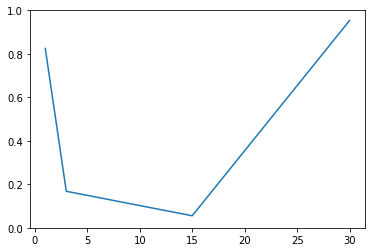

In [20]:
plt.plot(distances, errors)
plt.ylim((0,1))

In [21]:
np.savez_compressed("Predicted_train_6positions_200epochs.npz",
                   true = y_true, pred = y_pred)

In [22]:
DATA_DIR_DEEPTHOUGHT = os.path.join("/",'storage','yw18581','data')
data_dir = DATA_DIR_DEEPTHOUGHT


root_folder = os.path.join(data_dir, "dataset")


excluded = ['10x10_1mm_first_clean', '10x10_3mm_first_clean', '10x10_15mm_first_clean', '10x10_30mm_first_clean',
            '10x10_1mm_second_clean', '10x10_3mm_second_clean', '10x10_15mm_second_clean', '10x10_30mm_second_clean',
            '10x10_1mm_third_clean', '10x10_3mm_third_clean', '10x10_15mm_third_clean', '10x10_30mm_third_clean']
data_loaders, data_lengths = define_dataset(root_folder, batch_size=16, excluded_list=excluded)

data_lengths

{'train': 3456, 'val': 864, 'test': 1080}

In [23]:
y_true, y_pred = inference_phase_rUNet(model, data_loaders, data_lengths, batch_size=16,
                                      notebook=True)

In [24]:
print("mse: {}".format(mean_squared_error(y_true, y_pred)))

mse: 0.00024285830501323208


In [25]:
np.savez_compressed("Predicted_testdata_6positions_200epochs.npz",
                   true = y_true, pred = y_pred)